In [1]:
# reload
#%reset
%load_ext autoreload
%autoreload 2 

import warnings
import logging
import os

# DEBUG MODE
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
warnings.filterwarnings('ignore')
logging.getLogger('tensorflow').setLevel(logging.FATAL)
    
from s3l_training import s3l_training

Run with random seed:  561
GPU is available.
1
True
12.1
Concatenating runs:  range(1, 11)
Time to read csv file for run:  3.1072099208831787
Loaded run 1
Time to read csv file for run:  3.0883383750915527
Loaded run 2
Time to read csv file for run:  3.132815361022949
Loaded run 3
Time to read csv file for run:  3.0924978256225586
Loaded run 4
Time to read csv file for run:  2.982867479324341
Loaded run 5
Time to read csv file for run:  2.821483850479126
Loaded run 6
Time to read csv file for run:  3.0299770832061768
Loaded run 7
Time to read csv file for run:  2.9481236934661865
Loaded run 8
Time to read csv file for run:  2.9949142932891846
Loaded run 9
Time to read csv file for run:  3.0369679927825928
Loaded run 10
pretrain_data, before removing rows that dont have traffic  (1799100, 102)
pretrain_data, after removing rows that dont have traffic  (205538, 102)
X_pretrain  (205086, 92)


Seed set to 42


HYPERPARAMETERS:  {'loss_fn': 'MSELoss', 'metric': 'r2_score', 'hidden_dim': 300, 'max_epochs': 100, 'batch_size': 128, 'optim_hparams': {'lr': 0.0001, 'weight_decay': 5e-05}, 'encoder_depth': 4, 'head_depth': 2, 'dropout_rate': 0.1, 'noise_type': 'Swap', 'noise_ratio': 0.3}


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


refresh rate:  10



  | Name                     | Type    | Params | Mode 
-------------------------------------------------------------
0 | task_loss_fn             | MSELoss | 0      | train
1 | mask_loss_fn             | BCELoss | 0      | train
2 | categorical_feature_loss | BCELoss | 0      | train
3 | continuous_feature_loss  | MSELoss | 0      | train
4 | model                    | DAE     | 584 K  | train
-------------------------------------------------------------
584 K     Trainable params
0         Non-trainable params
584 K     Total params
2.338     Total estimated model params size (MB)


Epoch 99: 100%|███████████████████████████████████████████████████████| 1451/1451 [00:18<00:00, 80.61it/s, train_loss=0.777, val_loss=0.744]

`Trainer.fit` stopped: `max_epochs=100` reached.


Epoch 99: 100%|███████████████████████████████████████████████████████| 1451/1451 [00:18<00:00, 80.44it/s, train_loss=0.777, val_loss=0.744]


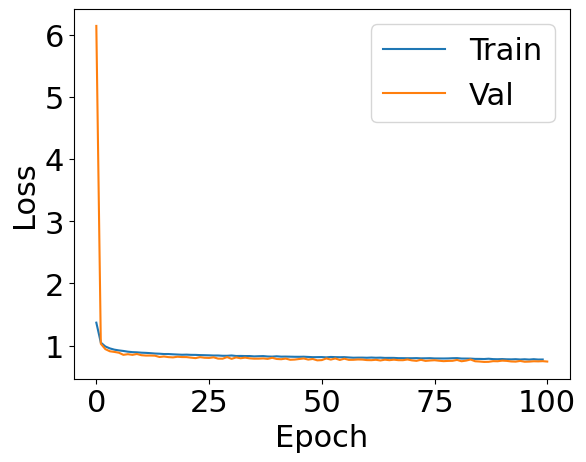

DONE SAVING PRETRAINED MODEL
   | Name                                             | Type        | Params | Mode 
------------------------------------------------------------------------------------------
0  | task_loss_fn                                     | MSELoss     | 0      | train
1  | mask_loss_fn                                     | BCELoss     | 0      | train
2  | categorical_feature_loss                         | BCELoss     | 0      | train
3  | continuous_feature_loss                          | MSELoss     | 0      | train
4  | model                                            | DAE         | 584 K  | train
5  | model._DAE__encoder                              | MLP         | 300 K  | train
6  | model._DAE__encoder.linear_0                     | Linear      | 27.9 K | train
7  | model._DAE__encoder.batchnorm_0                  | BatchNorm1d | 600    | train
8  | model._DAE__encoder.relu_0                       | ReLU        | 0      | train
9  | model._DAE__encoder.dropo

In [2]:
s3l_training(pretrain=True, # if True First Phase training
             use_pretrained_model=False, # if True Second Phase learning
             pt_type='dae', 
             pt_folder='FP7')